In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statistics
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
X_train = pd.read_csv("Bases/base_xtrain.csv")
X_test = pd.read_csv("Bases/base_xtest.csv")
y_train = pd.read_csv("Bases/base_ytrain.csv")
y_test = pd.read_csv("Bases/base_ytest.csv")

In [4]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [8]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=3)
modelo2 = RandomForestClassifier(n_estimators=30, max_depth=5, max_features="sqrt")
rede_neural = MLPClassifier(solver='adam', hidden_layer_sizes=(20, 10), alpha=1e-4, max_iter=200, random_state=1)
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1), n_estimators=10, random_state=1)
naive = GaussianNB()
scoresAD = cross_val_score(modelo, X_train, y_train, cv=kf)
scoresRF = cross_val_score(modelo2, X_train, y_train, cv=kf)
scoresNY = cross_val_score(naive, X_train, y_train, cv=kf)
scoresBG = cross_val_score(bagging, X_train, y_train, cv=kf)
scoresRNA = cross_val_score(rede_neural, X_train, y_train, cv=kf)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

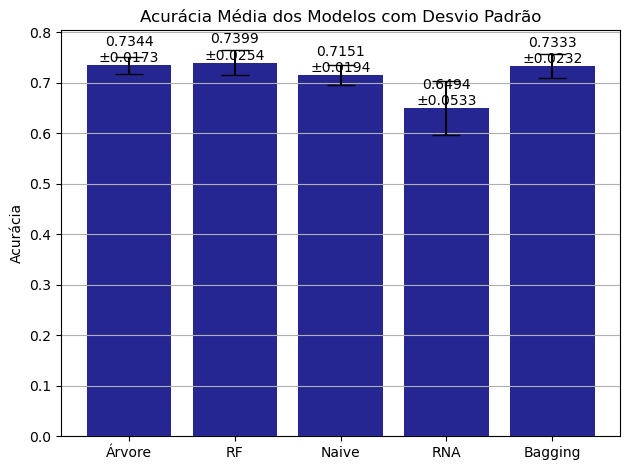

In [9]:
# Calculando as médias e os desvios padrões
models = ['Árvore', 'RF', 'Naive', 'RNA', 'Bagging']  # Nomes dos modelos
scores = [scoresAD, scoresRF, scoresNY, scoresRNA, scoresBG]
means = [score.mean() for score in scores]  # Média das acurácias
stds = [score.std() for score in scores]  # Desvio padrão das acurácias

# Criando o gráfico de barras
x_pos = np.arange(len(models))  # Posições no eixo x

fig, ax = plt.subplots()

# Barras de erro com cor azul escuro
bars = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.85, ecolor='black', capsize=10, color='navy')
ax.set_ylabel('Acurácia')  # Rótulo do eixo y
ax.set_xticks(x_pos)  # Posições no eixo x
ax.set_xticklabels(models)  # Nomes dos modelos como etiquetas no eixo x
ax.set_title('Acurácia Média dos Modelos com Desvio Padrão')  # Título do gráfico
ax.yaxis.grid(True)  # Adiciona uma grade no eixo y

# Adicionando legendas nas barras
for bar, mean, std in zip(bars, means, stds):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{mean:.4f}\n±{std:.4f}', ha='center', va='bottom', color='black')

# Ajustando o layout para exibir o gráfico corretamente
plt.tight_layout()
plt.show()

FOLD: 1
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       182
           1       0.73      0.84      0.78       165

    accuracy                           0.78       347
   macro avg       0.78      0.78      0.78       347
weighted avg       0.78      0.78      0.77       347



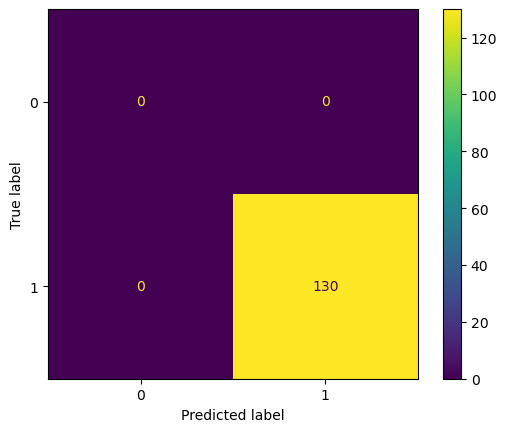

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       186
           1       0.72      0.84      0.77       161

    accuracy                           0.77       347
   macro avg       0.78      0.78      0.77       347
weighted avg       0.78      0.77      0.77       347



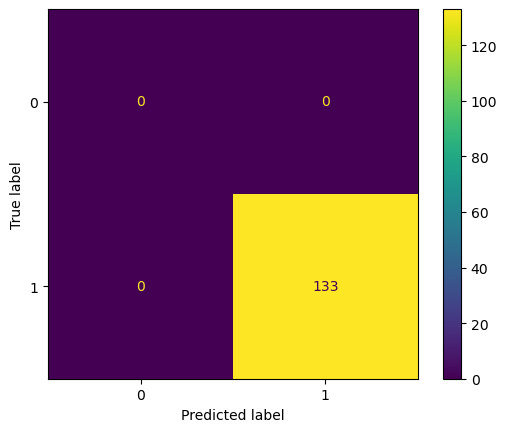

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       184
           1       0.76      0.88      0.82       163

    accuracy                           0.81       347
   macro avg       0.82      0.82      0.81       347
weighted avg       0.82      0.81      0.81       347



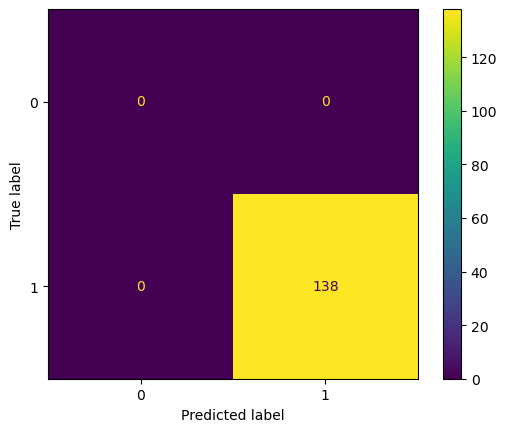

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       163
           1       0.73      0.84      0.78       184

    accuracy                           0.75       347
   macro avg       0.75      0.74      0.74       347
weighted avg       0.75      0.75      0.74       347



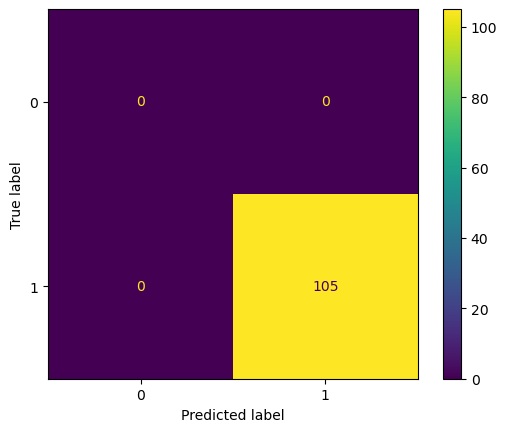

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.77      0.66      0.72       170
           1       0.72      0.81      0.76       177

    accuracy                           0.74       347
   macro avg       0.75      0.74      0.74       347
weighted avg       0.74      0.74      0.74       347



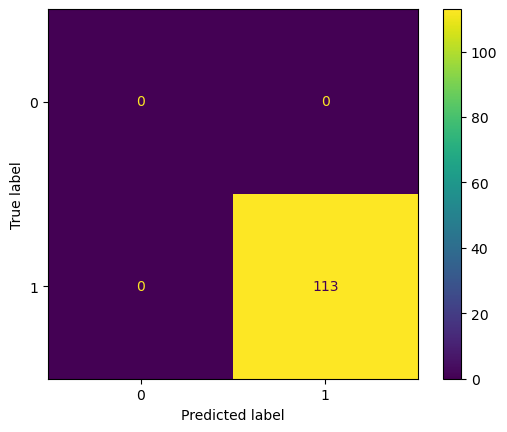

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       165
           1       0.74      0.86      0.79       182

    accuracy                           0.77       347
   macro avg       0.78      0.76      0.76       347
weighted avg       0.77      0.77      0.76       347



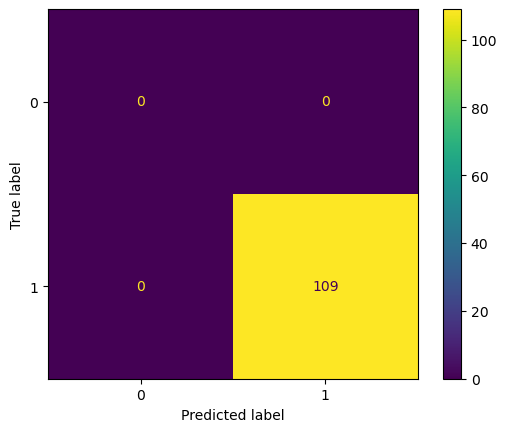

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.74      0.57      0.65       159
           1       0.70      0.83      0.76       188

    accuracy                           0.71       347
   macro avg       0.72      0.70      0.70       347
weighted avg       0.72      0.71      0.71       347



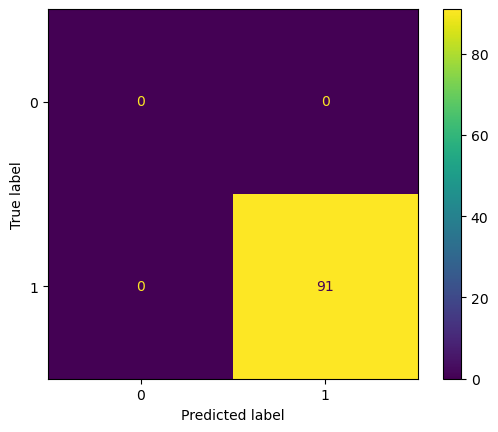

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.81      0.64      0.71       178
           1       0.69      0.84      0.76       169

    accuracy                           0.74       347
   macro avg       0.75      0.74      0.74       347
weighted avg       0.75      0.74      0.74       347



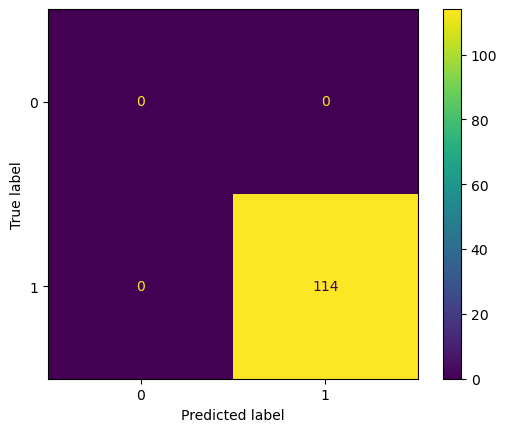

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       176
           1       0.72      0.82      0.77       170

    accuracy                           0.76       346
   macro avg       0.76      0.76      0.76       346
weighted avg       0.76      0.76      0.76       346



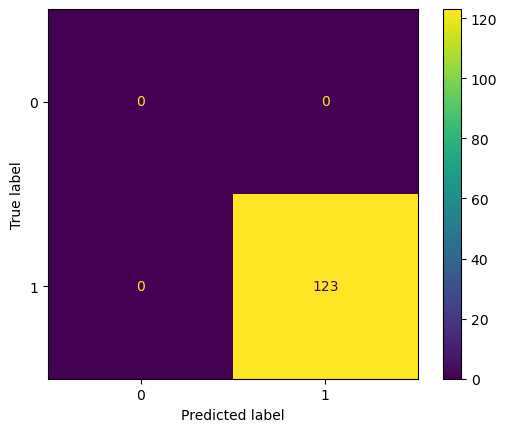

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       171
           1       0.72      0.82      0.77       175

    accuracy                           0.75       346
   macro avg       0.75      0.75      0.75       346
weighted avg       0.75      0.75      0.75       346



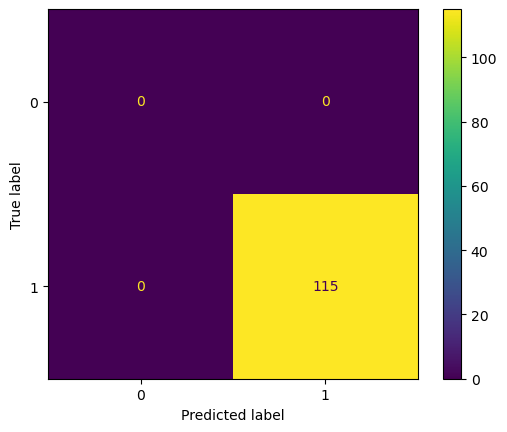

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.8  0.72]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.67 0.84]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.73 0.78]


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay
import copy

melhor = 0

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0, 0]
recall_valid = [0, 0]
fscore_valid = [0, 0]

for train_index, valid_index in kf.split(X_train):
    x_train = X_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]    

    x_valid = X_train.iloc[valid_index]
    y_valid = y_train.iloc[valid_index]

    modelo.fit(x_train, y_train_fold)
    predito = modelo2.predict(x_valid)

    # Calculando as métricas
    precision, recall, fscore, support = precision_recall_fscore_support(y_valid, predito, average=None)
    precision_valid = np.add(precision_valid, precision)
    recall_valid = np.add(recall_valid, recall)
    fscore_valid = np.add(fscore_valid, fscore)

    acuracia = np.mean(y_valid.values.ravel() == predito)

    if acuracia > melhor:
        melhor = acuracia
        best_model = copy.deepcopy(modelo2)

    print('FOLD: ' + str(fold))
    print(classification_report(y_valid, predito, target_names=labels))

    cm = confusion_matrix(y_valid, predito, labels=labels2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()

    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: ", np.round(precision_valid / 10, 2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: ", np.round(recall_valid / 10, 2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: ", np.round(fscore_valid / 10, 2))